# Loading the data

In [86]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
%matplotlib inline

df = read_csv('resources/dataset.csv')

# Data Analysis before normalization

In [87]:
from matplotlib import pyplot as plt

## Shape and types

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [89]:
df.shape

(4920, 18)

In [90]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


## Features and Classes

In [92]:
# All diseases entries
diseasesEntries = df['Disease']

# List of all diseases
diseases = diseasesEntries.unique()

# All symptoms entries
symptomsEntries = df[df.columns.difference(['Disease'])].stack()

# List of all symptoms
symptoms = symptomsEntries.unique()

### Classes (Diseases)

In [93]:
df.groupby('Disease').size()

Disease
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Acne                                       120
Alcoholic hepatitis                        120
Allergy                                    120
Arthritis                                  120
Bronchial Asthma                           120
Cervical spondylosis                       120
Chicken pox                                120
Chronic cholestasis                        120
Common Cold                                120
Dengue                                     120
Diabetes                                   120
Dimorphic hemmorhoids(piles)               120
Drug Reaction                              120
Fungal infection                           120
GERD                                       120
Gastroenteritis                            120
Heart attack                               120
Hepatitis B                                120
Hepatitis C                                120
Hepat

In [94]:
len(diseases)

41

#### Symptoms

In [95]:
pd.DataFrame(symptoms)

,0
0,itching
1,skin_rash
2,nodal_skin_eruptions
3,dischromic _patches
4,continuous_sneezing
...,...
126,small_dents_in_nails
127,inflammatory_nails
128,blister
129,red_sore_around_nose


In [96]:
len(symptoms)

131

#### Number of symptoms per entry

<AxesSubplot:ylabel='Frequency'>

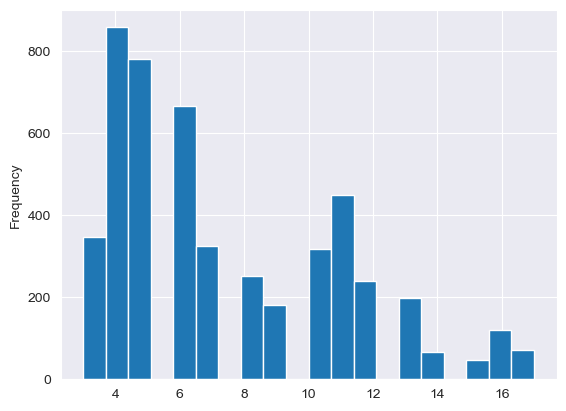

In [97]:
number_of_symptoms_per_entry = df.iloc[:, 1:].count(axis=1)
number_of_symptoms_per_entry.plot(kind='hist', bins=20)

## Duplicates analysis

In [98]:
df.shape

(4920, 18)

In [99]:
df_without_duplicates = df.drop_duplicates()
df_without_duplicates.shape

(304, 18)

<AxesSubplot:>

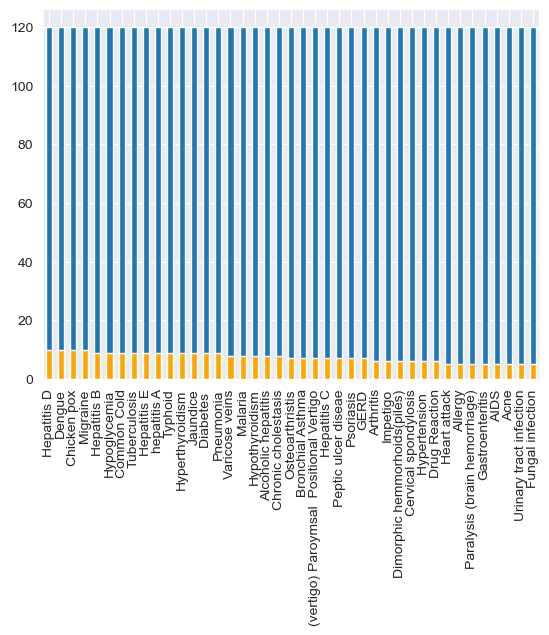

In [100]:
number_of_entries_per_disease = df['Disease'].value_counts()
number_of_entries_per_disease_without_duplicates = df_without_duplicates['Disease'].value_counts()

number_of_entries_per_disease.plot.bar()
number_of_entries_per_disease_without_duplicates.plot.bar(color='orange')

# One hot encoding

## Conversion

### From `Symptom_1` to `Symptom_17` to `Symptoms`




Convert from
```json
{
    "Disease": ["String"],
    "Symptom_1": ["String"],
    "...":["String"],
    "Symptom_17": ["String"]
} 
```
to
```json
{
    "Disease": ["String"], 
    "Symptoms": [["String"]]
}
```

In [101]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:

symptom_cols = [col for col in df if col.startswith('Symptom_')]
df_converted = df.apply(lambda row: [symptoms for symptoms in row[symptom_cols] if pd.notnull(symptoms)], axis=1).to_frame(name='Symptoms')
df_converted['Disease'] = diseasesEntries
df_converted = df_converted[['Disease', 'Symptoms']]
df_converted.head()


,Disease,Symptoms
0,Fungal infection,"[itching, skin_rash, nodal_skin_eruptions, ..."
1,Fungal infection,"[ skin_rash, nodal_skin_eruptions, dischromi..."
2,Fungal infection,"[itching, nodal_skin_eruptions, dischromic _..."
3,Fungal infection,"[itching, skin_rash, dischromic _patches]"
4,Fungal infection,"[itching, skin_rash, nodal_skin_eruptions]"


### From `Symptoms` to `Symptoms_one_hot`

In [103]:
Symptoms_one_hot = pd.get_dummies(df_converted['Symptoms'].apply(pd.Series).stack()).groupby(level=0).sum()
Symptoms_one_hot.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### From `Diease` to `Disease_one_hot`

In [104]:
Disease_one_hot = pd.get_dummies(df_converted['Disease'])
Disease_one_hot.head()

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Merging

In [105]:
df_one_hot = pd.concat([Symptoms_one_hot, Disease_one_hot], axis=1)

symptoms_cols_range = range(0, len(symptoms))
diseases_cols_range = range(len(symptoms), len(symptoms) + len(diseases))

df_one_hot.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature based sampling

In [201]:
df_one_hot_without_duplicates = df_one_hot.drop_duplicates()

## Duplicates analysis before sampling

In [202]:
df_one_hot.shape

(4920, 172)

In [203]:
df_one_hot_without_duplicates.shape

(304, 172)

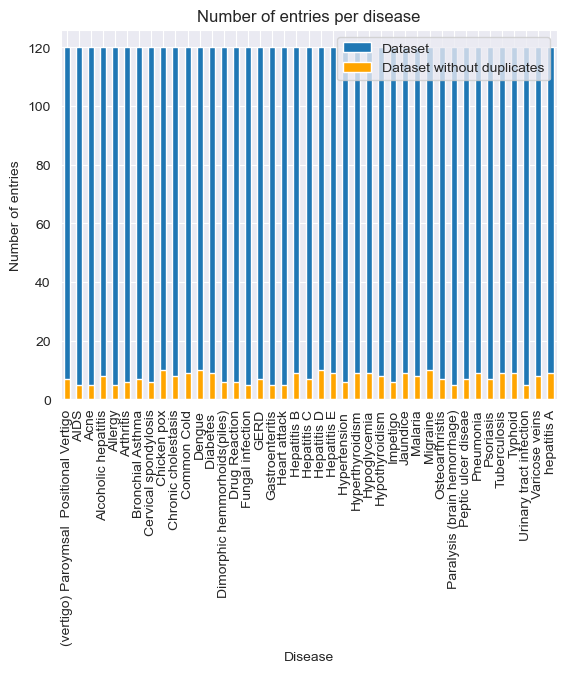

In [204]:
number_of_entries_per_disease = df_one_hot.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)
number_of_entries_per_disease_without_duplicates = df_one_hot_without_duplicates.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)

# plot the number of entries per disease before and after removing duplicates
number_of_entries_per_disease.plot.bar()
number_of_entries_per_disease_without_duplicates.plot.bar(color='orange')

# add labels
plt.xlabel('Disease')
plt.ylabel('Number of entries')
plt.title('Number of entries per disease')
plt.legend(['Dataset', 'Dataset without duplicates'])

## Sampling

In [235]:
# Split in identical subsets
identical_subsets = pd.DataFrame({'subset': []})
df_one_hot_without_duplicates = df_one_hot.drop_duplicates()

for subset_model in df_one_hot_without_duplicates.values :
    subset = pd.DataFrame(columns=df_one_hot.columns)
    for element in df_one_hot.values :
        if np.array_equal(subset_model, element) :
            subset.loc[len(subset)] = element
    identical_subsets.loc[len(identical_subsets)] = [subset]

print('{} subsets identified'.format(len(identical_subsets)))
print('Subsets contain {:.2f} elements on average'.format(identical_subsets['subset'].apply(lambda x: len(x)).mean()))

# divide by ten the number of elements in each subset
for index, row in identical_subsets.iterrows() :
    subset = row['subset']
    subset_len = len(subset)
    subset_len_aim = int(subset_len / 5)
    if subset_len_aim == 0 :
        subset_len_aim = 1
    subset = subset.iloc[0:subset_len_aim]
    identical_subsets.loc[index] = [subset]

print('Subsets contain {:.2f} elements on average after sampling'.format(identical_subsets['subset'].apply(lambda x: len(x)).mean()))
print('{} subsets are empty'.format(len(identical_subsets[identical_subsets['subset'].apply(lambda x: len(x)) == 0])))
print('{} subsets contain only one element'.format(len(identical_subsets[identical_subsets['subset'].apply(lambda x: len(x)) == 1])))

# Concatenate all subsets
df_one_hot_sampled = pd.concat([row['subset'] for index, row in identical_subsets.iterrows()])

print('The dataset contained {} elements before sampling, and {} elements after sampling'.format(df_one_hot.shape[0], df_one_hot_sampled.shape[0]))

304 subsets identified
Subsets contain 16.18 elements on average
Subsets contain 2.97 elements on average after sampling
0 subsets are empty
216 subsets contain only one element
The dataset contained 4920 elements before sampling, and 904 elements after sampling


## Data Analysis after sampling

In [236]:
df_one_hot_sampled.shape

(904, 172)

In [237]:
df_one_hot_sampled_without_duplicates = df_one_hot_sampled.drop_duplicates()
df_one_hot_sampled_without_duplicates.shape

(304, 172)

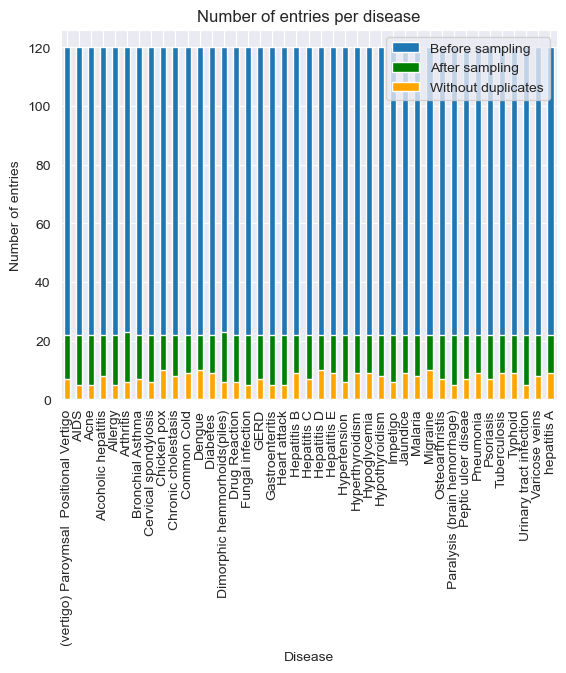

In [238]:
number_of_entries_per_disease = df_one_hot.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)
number_of_entries_per_disease_sampled = df_one_hot_sampled.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)
number_of_entries_per_disease_without_duplicates = df_one_hot_without_duplicates.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)

# plot the number of entries per disease before and after sampling, and without duplicates
number_of_entries_per_disease.plot.bar()
number_of_entries_per_disease_sampled.plot.bar(color='green')
number_of_entries_per_disease_without_duplicates.plot.bar(color='orange')

# add labels
plt.xlabel('Disease')
plt.ylabel('Number of entries')
plt.title('Number of entries per disease')
plt.legend(['Before sampling', 'After sampling', 'Without duplicates'])


# Models

## Train and test split

In [239]:
X = df_one_hot_sampled.iloc[:, 0:len(symptoms)]
y = df_one_hot_sampled.iloc[:, len(symptoms):len(symptoms) + len(diseases)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

y_train_labels = y_train.idxmax(axis=1)
y_test_labels = y_test.idxmax(axis=1)

## Logistic Regression

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train_labels)

y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test_labels))
print(accuracy_score(y_test_labels, y_pred))

from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True)).transpose()
classification_report_df


1.0
1.0


,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.0,1.0,1.0,13.0
AIDS,1.0,1.0,1.0,11.0
Acne,1.0,1.0,1.0,11.0
Alcoholic hepatitis,1.0,1.0,1.0,19.0
Allergy,1.0,1.0,1.0,13.0
Arthritis,1.0,1.0,1.0,9.0
Bronchial Asthma,1.0,1.0,1.0,12.0
Cervical spondylosis,1.0,1.0,1.0,10.0
Chicken pox,1.0,1.0,1.0,13.0
Chronic cholestasis,1.0,1.0,1.0,18.0


## KNN

best mean cross-validation score: 1.000
best parameters: {'n_neighbors': 1}
test-set score: 1.000
accuracy: 1.00


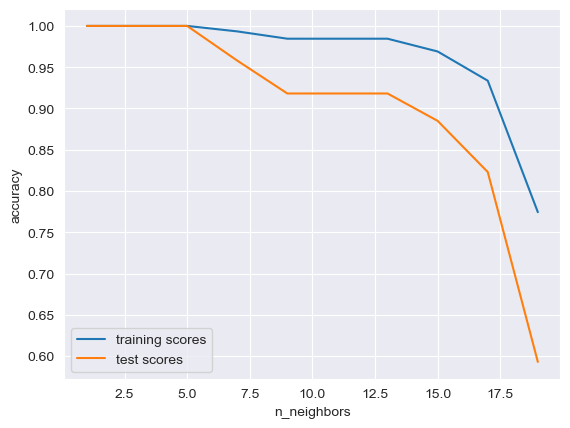

In [241]:
from sklearn.neighbors import KNeighborsClassifier

#Model complexity
neighbors = range(1, 20, 2)

training_scores = []
test_scores = []

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid_knn = {'n_neighbors': np.arange(1, 20, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn,
                    cv=5, return_train_score=True)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

# KNN with the best parameters
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors']) 
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)


## Decision Tree

In [242]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an instance of the DecisionTreeClassifier class
clf = DecisionTreeClassifier(random_state=42, max_features=1)

# Fit the decision tree to the training data
clf.fit(X_train, y_train_labels)

# Predict the disease for the test data using the trained decision tree
y_pred = clf.predict(X_test)
y_test_labels = y_test.idxmax(axis=1)

# Print a summary of the classification metrics
from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True, zero_division=0)).transpose()
classification_report_df

,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.000000,0.923077,0.960000,13.000000
AIDS,1.000000,1.000000,1.000000,11.000000
Acne,1.000000,1.000000,1.000000,11.000000
Alcoholic hepatitis,1.000000,0.894737,0.944444,19.000000
Allergy,1.000000,1.000000,1.000000,13.000000
Arthritis,1.000000,0.888889,0.941176,9.000000
Bronchial Asthma,1.000000,0.833333,0.909091,12.000000
Cervical spondylosis,0.769231,1.000000,0.869565,10.000000
Chicken pox,0.923077,0.923077,0.923077,13.000000
Chronic cholestasis,1.000000,0.944444,0.971429,18.000000


C:\Users\Tom Bourjala\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


best mean cross-validation score: 0.940
best parameters: {'max_depth': 33}
test-set score: 0.892


C:\Users\Tom Bourjala\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


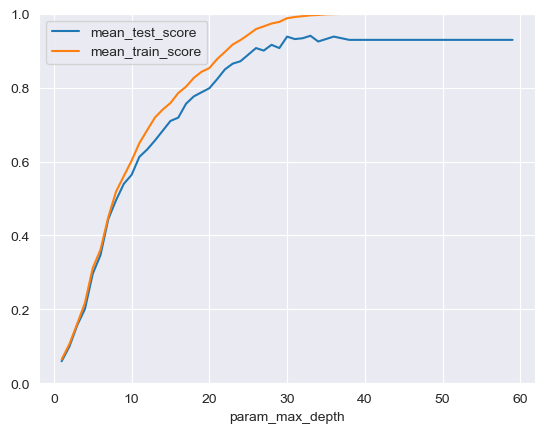

In [269]:
# Optimum “max_depth_node”
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 60, 1)}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42, max_features=3), param_grid=param_grid,
                    cv=5, return_train_score=True)

grid.fit(X_train, y_train_labels)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_test_score', 'mean_train_score'], ylim=(0, 1))

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test_labels)))

C:\Users\Tom Bourjala\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Tom Bourjala\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


best mean cross-validation score: 0.940
best parameters: {'max_depth': 33, 'max_features': 3}
test-set score: 0.892


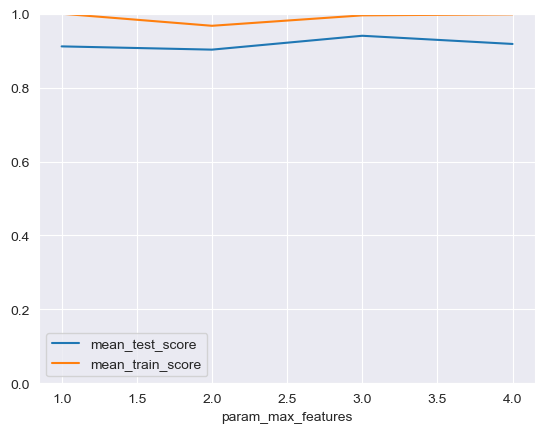

In [272]:
param_grid = {'max_features': range(1, 5, 1), 'max_depth': [grid.best_params_['max_depth']]}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid,
                    cv=5, return_train_score=True)

grid.fit(X_train, y_train_labels)

scores = pd.DataFrame(grid.cv_results_)

scores.plot(x='param_max_features', y=['mean_test_score', 'mean_train_score'], ylim=(0, 1))

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test_labels)))

In [267]:
# Decision Tree with the best parameters
clf = DecisionTreeClassifier(random_state=42, max_depth=grid.best_params_['max_depth'], max_features=grid.best_params_['max_features'])
clf.fit(X_train, y_train_labels)
print("accuracy: {:.2f}".format(clf.score(X_test, y_test_labels)))
y_pred = clf.predict(X_test)

# Print a summary of the classification metrics
from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True, zero_division=0)).transpose()
classification_report_df

accuracy: 0.89


,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.000000,0.923077,0.960000,13.000000
AIDS,0.846154,1.000000,0.916667,11.000000
Acne,1.000000,1.000000,1.000000,11.000000
Alcoholic hepatitis,1.000000,0.894737,0.944444,19.000000
Allergy,1.000000,0.923077,0.960000,13.000000
Arthritis,1.000000,0.888889,0.941176,9.000000
Bronchial Asthma,1.000000,1.000000,1.000000,12.000000
Cervical spondylosis,1.000000,1.000000,1.000000,10.000000
Chicken pox,1.000000,0.923077,0.960000,13.000000
Chronic cholestasis,0.842105,0.888889,0.864865,18.000000


## Random Forest

In [274]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier class
clf = RandomForestClassifier(random_state=42, max_features=1)

# Fit the decision tree to the training data
clf.fit(X_train, y_train_labels)

# Predict the disease for the test data using the trained decision tree
y_pred = clf.predict(X_test)
y_test_labels = y_test.idxmax(axis=1)

# Print a summary of the classification metrics
from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True, zero_division=0)).transpose()
classification_report_df

,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.0,1.0,1.0,13.0
AIDS,1.0,1.0,1.0,11.0
Acne,1.0,1.0,1.0,11.0
Alcoholic hepatitis,1.0,1.0,1.0,19.0
Allergy,1.0,1.0,1.0,13.0
Arthritis,1.0,1.0,1.0,9.0
Bronchial Asthma,1.0,1.0,1.0,12.0
Cervical spondylosis,1.0,1.0,1.0,10.0
Chicken pox,1.0,1.0,1.0,13.0
Chronic cholestasis,1.0,1.0,1.0,18.0
